In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/Abdillahi/Documents/Projet_Capstone/Titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nous avons à notre disposition un datasets composé de 891 enregistrements et de 12 variables ainsi que leurs typestion

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.shape

(891, 12)

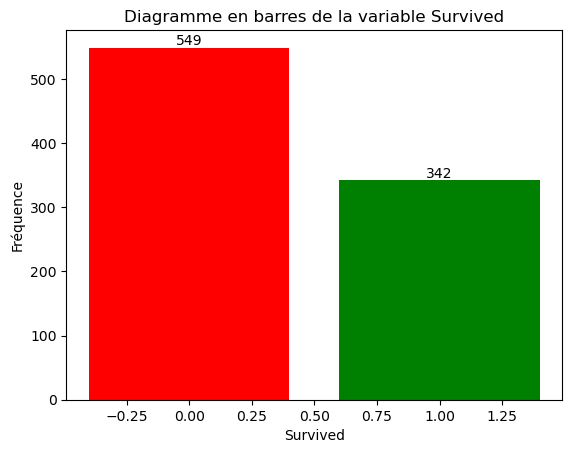

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
survived_counts = data['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])

# Ajouter les annotations pour chaque barre
for i, value in enumerate(survived_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Étiquettes et titre
plt.xlabel('Survived')
plt.ylabel('Fréquence')
plt.title('Diagramme en barres de la variable Survived')
plt.show()


In [7]:
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

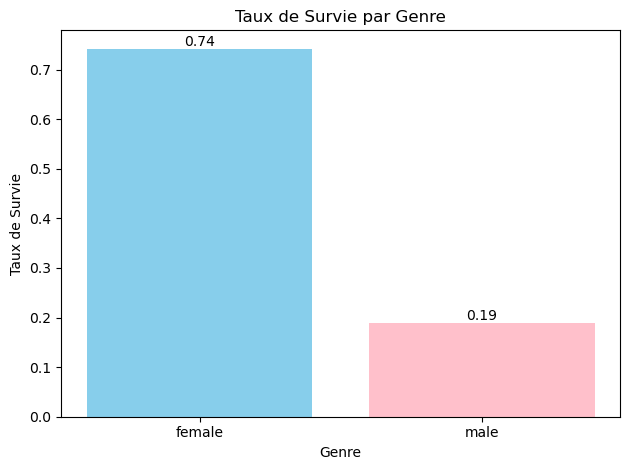

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
survived_by_gender = data.groupby('Sex')['Survived'].mean()

plt.bar(survived_by_gender.index, survived_by_gender.values, color=['skyblue', 'pink'])

# Ajouter les annotations pour chaque barre
for i, value in enumerate(survived_by_gender.values):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

# Étiquettes et titre
plt.xlabel('Genre')
plt.ylabel('Taux de Survie')
plt.title('Taux de Survie par Genre')

# Afficher le graphique
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


74% des femmes ont survecu par rapport à seulement 19% des hommes, ce qui montre l'impact du genre sur la survie

In [9]:
from sklearn.impute import SimpleImputer

# Créer un imputeur avec la stratégie 'mean' (moyenne)
imputer = SimpleImputer(strategy='mean')

# Sélectionner uniquement la colonne 'Age' pour l'imputation
age_column = data['Age'].values.reshape(-1, 1)

# Imputer les valeurs manquantes dans la colonne 'Age'
age_column_imputed = imputer.fit_transform(age_column)

# Remplacer la colonne 'Age' dans data par les valeurs imputées
data['Age'] = age_column_imputed


In [10]:
from sklearn.impute import SimpleImputer

# Créer un imputeur avec la  'most_frequent' (valeur la plus fréquente)
imputer = SimpleImputer(strategy='most_frequent')

# Imputer les valeurs manquantes dans toutes les données
data_imputed = imputer.fit_transform(data)

# Reconstruire un DataFrame avec les données imputées
data = pd.DataFrame(data_imputed, columns=data.columns)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
data_encoded = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)
data_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,B96 B98,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,B96 B98,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,B96 B98,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0,B96 B98,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.45,B96 B98,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0,C148,True,False,False


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data_encoded[['Pclass','SibSp','Parch','Sex_male']]
y = data_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()






In [15]:

print(f"y_train unique values: {y_train.unique()}")
print(f"y_test unique values: {y_test.unique()}")

# Check if the target variable is of type int or float
print(f"y_train type: {type(y_train)}")

# If the target variable is not of type int or float, convert it to one of those types
if not (y_train.dtype == int or y_train.dtype == float):
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

# Rerun the code
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

y_train unique values: [0 1]
y_test unique values: [1 0]
y_train type: <class 'pandas.core.series.Series'>
Accuracy: 0.78


Améliorer le modèle

In [16]:
# prompt: random forest

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the random forest classifier with the best hyperparameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


ValueError: array length 179 does not match index length 418